In [3]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



data = ["model50","3_141","3_200","3_0_500","3_800","3_1000","3_1200","3_1500","3_2000"]
legends =["50","141","200","500","800","1000","1200","1500","2000"]
S_list = []
maximum = []
eff = []
bkg = []






S_list = []

pfom_list = []
maximum = []


clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/models/model50.txt")

In [2]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import functions as fc
from sklearn.model_selection import StratifiedShuffleSplit


def sensitivity(pfom_max,B_events):

    bf = 2*0.514*4.6e-6
    sigma=1.11e6 #fb
    l=100/3 #fb⁻¹
    ns=bf*sigma*l*pfom_max
    print(f"Number of sensitivity events: {ns:.2}")
    return ns/B_events



def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)


df = pq.read_table(f"/ceph/aavocone/Datasets/3_large.parquet")
df = df.to_pandas()

X = df[df.columns[:-1]]    
y = df["signal"]   
print("sum to len ratio in %",sum(y)/len(y)*100)

S_list    = []
P_max     = []
xgb_max = []


sss = StratifiedShuffleSplit(n_splits=10, random_state=0)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index[0], "TEST:", test_index[0])
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    print("sum to len ratio in %",sum(ytest)/len(ytest)*100)
    clf = XGBClassifier()
    clf.load_model(f"/ceph/aavocone/models/3_0_500.txt")
    yprob = clf.predict_proba(xtest)[:,1]
    sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest)
    pfom = fc.PFOM(s,b,bh,5)
    max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 
    b_max = bh >= max_index/100
    b_max = b_max[b_max!=0]

 
    print(f"Cut at xgb probability {max_index/100}")
    print("Number of background events after cut:",len(b_max))
    print("PFOM max:", max_value)
    S = sensitivity(pfom[max_index],len(b_max))
    print("Sensitivity:", S)
    P_max.append(pfom[max_index])
    S_list.append(S)
    xgb_max.append(bin_edges[max_index])
    print("--------------------------------------------------------")

print()
print("##################################################################################")
print("P_max:")
print(P_max)
print("Mean:", np.mean(P_max), "Std:", np.std(P_max))
print("P_max:")
print(S_list)
print("Mean:", np.mean(S_list), "Std:", np.std(S_list))

sum to len ratio in % 0.014432916803156757
sum to len ratio in % 0.014435073993239898
Cut at xgb probability 0.94
Number of background events after cut: 45678
PFOM max: 0.0007058388285859196
Number of sensitivity events: 0.12
Sensitivity: 2.6275120303333973e-06
--------------------------------------------------------
sum to len ratio in % 0.014435073993239898
Cut at xgb probability 0.95
Number of background events after cut: 37133
PFOM max: 0.0007058388285859196
Number of sensitivity events: 0.12
Sensitivity: 3.3547637694243667e-06
--------------------------------------------------------
sum to len ratio in % 0.014435073993239898
Cut at xgb probability 0.95
Number of background events after cut: 37126
PFOM max: 0.0007058388285859196
Number of sensitivity events: 0.12
Sensitivity: 3.3307527654333137e-06
--------------------------------------------------------
sum to len ratio in % 0.014435073993239898
Cut at xgb probability 0.95
Number of background events after cut: 37022
PFOM max: 0.0

In [3]:
print("P_max:")
print(P_max)
print("Mean:", np.mean(P_max), "Std:", np.std(P_max))
print("P_max:")
print(S_list)
print("Mean:", np.mean(S_list), "Std:", np.std(S_list))
print("xgb maximum:")
print(xgb_max)
print("Mean:", np.mean(xgb_max), "Std:", np.std(xgb_max))

P_max:
[0.0006859605232203868, 0.0007119824871290985, 0.0007067533684877324, 0.000694544938789401, 0.0007239500069526823, 0.0006911580847051163, 0.0007203561060684626, 0.0006868636643684112, 0.0006807251449999866, 0.0007058388285859196]
Mean: 0.0007008133153307199 Std: 1.4330967825844557e-05
P_max:
[2.6275120303333973e-06, 3.3547637694243667e-06, 3.3307527654333137e-06, 3.2824124018759342e-06, 4.435872783627394e-06, 3.268525027982094e-06, 4.444827842852737e-06, 3.240421526529989e-06, 4.1159582344406705e-06, 3.3493576195170477e-06]
Mean: 3.545040400201694e-06 Std: 5.594325940043309e-07
xgb maximum:
[0.9400000000000001, 0.9500000000000001, 0.9500000000000001, 0.9500000000000001, 0.96, 0.9500000000000001, 0.96, 0.9500000000000001, 0.96, 0.9500000000000001]
Mean: 0.952 Std: 0.005999999999999961


Text(0.5, 1.0, 'PFOM')

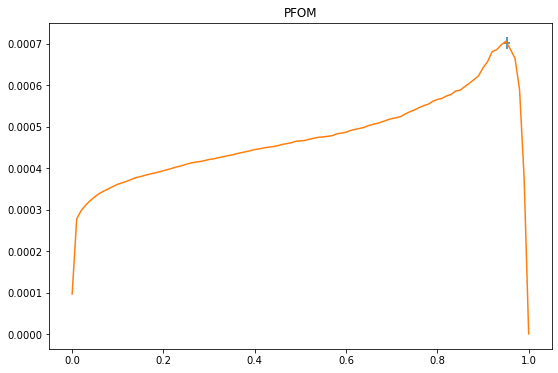

In [6]:
plt.figure(figsize=(9,6))
plt.errorbar(np.mean(xgb_max),np.mean(P_max), xerr=np.std(xgb_max),yerr=np.std(P_max))
plt.plot(bin_edges, pfom)
plt.title("PFOM")